### Example 6.2 Random Walk

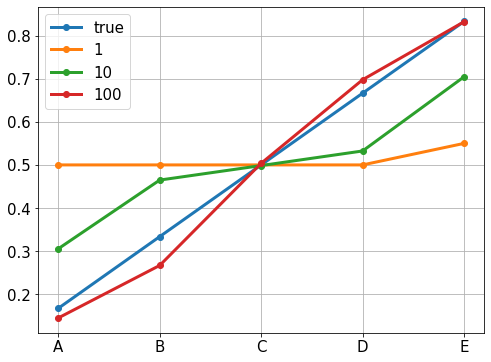

In [169]:
import numpy as np
import matplotlib.pyplot as plt

states=[0,1,2,3,4,5,6]
actions=[-1,1]
V_true=np.arange(1,6)/6.0

def step(s,a):
      
    s_=s+a
    
    if s_==0:
        return s_,0,True
    elif s_==6:
        return s_,1,True 
    else:
        return s_,0,False


def get_td_v(n_eps,lr):
    
    V=np.ones(len(states))*0.5
    rms=[]
    
    for ep in range(n_eps):

        s=np.random.choice(states[1:6])

        while True:     

            s_old=s
            #v_all.append(V[s_old])
            a=np.random.choice(actions)
            s,r,done=step(s_old,a)

            if done:
                V[s_old]+=lr*(r-V[s_old])
            else:
                V[s_old]+=lr*(r+V[s]-V[s_old])

            #traj.append(s)
            #rs.append(r)
            if done:
                break
                
        rms.append(np.sqrt(np.sum(np.power(V_true-V[1:6],2))/5.0))
                
    return V,rms

v1,rms1=get_td_v(1,lr=0.1)
v10,rms10=get_td_v(10,lr=0.1)
v100,rms100=get_td_v(100,lr=0.1)

plt.figure(figsize=(8,6))
plt.plot(range(1,6),V_true,'-o',label='true',linewidth=3)
plt.plot(range(1,6),v1[1:6],'-o',label='1',linewidth=3)
plt.plot(range(1,6),v10[1:6],'-o',label='10',linewidth=3)
plt.plot(range(1,6),v100[1:6],'-o',label='100',linewidth=3)
plt.grid()
plt.xticks(range(1,6),('A','B','C','D','E'),fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig('td_randomwalk.png',dpi=350)

In [3]:
np.set_printoptions(suppress=True)

def get_mc_v(n_eps,lr):
    
    V=np.ones(len(states))*0.5
    rms=[]
    
    for ep in range(n_eps):

        s=np.random.choice(states[1:6])
        traj=[s]

        while True:     

            s_old=s
            a=np.random.choice(actions)
            s,r,done=step(s_old,a)
            
            traj.append(s)

            if done:
                break
        #print(r)
        for t in traj:
            V[t]+=lr*(r-V[t])
            
        rms.append(np.sqrt(np.sum(np.power(V_true-V[1:6],2))/5.0))
                
    return V,rms

v100,rms100=get_mc_v(100000,lr=0.01)

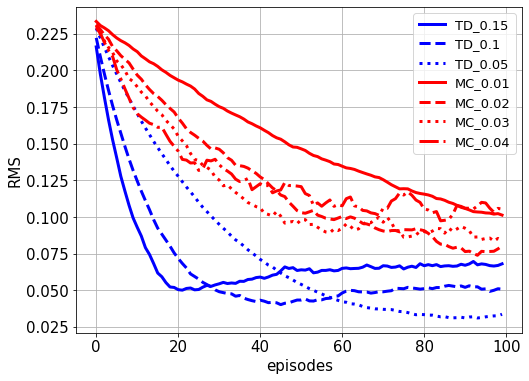

In [170]:
lr_td=[0.15,0.1,0.05]
lr_mc=[0.01,0.02,0.03,0.04]

ls=['-','--',':','-.']
plt.figure(figsize=(8,6))

for i,lr in enumerate(lr_td):
    rms_all=[]
    for j in range(100):
        _,rms=get_td_v(100,lr=lr)
        rms_all.append(rms)
        
    plt.plot(np.array(rms_all).mean(axis=0),color='b',label='TD_'+str(lr),linestyle=ls[i],linewidth=3)
    
for i,lr in enumerate(lr_mc):
    rms_all=[]
    for j in range(100):
        _,rms=get_mc_v(100,lr=lr)
        rms_all.append(rms)

    plt.plot(np.array(rms_all).mean(axis=0),color='r',label='MC_'+str(lr),linestyle=ls[i],linewidth=3)
    
plt.legend(loc='upper right',fontsize=13)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('episodes',fontsize=15)
plt.ylabel('RMS',fontsize=15)
plt.savefig('td_mc_randomwalk.png',dpi=350)

In [107]:
def get_traj(method='td'):
    
    s=np.random.choice(states[1:6])
    traj=[s]
    rew=[0]
    while True:     

        s_old=s
        a=np.random.choice(actions)
        s,r,done=step(s_old,a)
        traj.append(s)
        rew.append(r)
        
        if done:
            break
    
    
    if method=='td':
        return traj, rew
    else:
        return traj, [r]*(len(traj)-1)

def get_batch(method='td',lr=0.001,n_runs=100,n_eps=100):
    
    rms_all=[]
    
    for n in range(n_runs):
        
        trajs=[]
        rews=[]
        rms=[]
        V=np.array([0.,-1.,-1.,-1.,-1.,-1.,1.])

        for ep in range(n_eps):
              
            traj,rew=get_traj(method=method)
            
            trajs.append(traj)
            rews.append(rew)

            while True:

                V_batch=np.zeros(len(states))
                for tj,r in zip(trajs,rews):
                    for i in range(0,len(tj)-1):
                        if method=='td':
                            V_batch[tj[i]]+=r[i]+V[tj[i+1]]-V[tj[i]]
                        else:
                            V_batch[tj[i]]+=r[i]-V[tj[i]]
                            
                V_batch*=lr

                if np.sum(np.abs(V_batch))<1e-3:
                    break

                V+=V_batch

            #print(V)
            rms.append(np.sqrt(np.sum(np.power(V_true-V[1:6],2))/5.0))
        
        rms_all.append(rms)
    return np.array(rms_all).mean(axis=0)

In [108]:
rms_td=get_batch(method='td')
rms_mc=get_batch(method='mc')

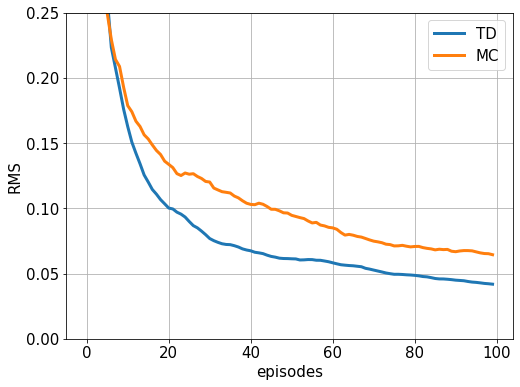

In [115]:
plt.figure(figsize=(8,6))
plt.plot(rms_td,label='TD',linewidth=3)
plt.plot(rms_mc,label='MC',linewidth=3)
plt.ylim([0,0.25])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('episodes',fontsize=15)
plt.ylabel('RMS',fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.savefig('batch_randomwalk.png',dpi=350)